In [2]:
import pandas as pd
import numpy as np
from pca import pca
import seaborn as sns
from matplotlib import pyplot as plt
from fuzzywuzzy import fuzz
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score
plt.rcParams["figure.figsize"] = (15,10)

/home/britto/myenv/lib/python3.6/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
/home/britto/myenv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/britto/myenv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that c

In [3]:
df = pd.read_csv('data/data_interview_test.csv',sep=":")

FileNotFoundError: [Errno 2] No such file or directory: 'data/data_interview_test.csv'

In [ ]:
df['Predi']

In [4]:
df.head(10)

,receipt_id,company_id,matched_transaction_id,feature_transaction_id,DateMappingMatch,AmountMappingMatch,DescriptionMatch,DifferentPredictedTime,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch
0,"10,000",10000,"10,468","10,000",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,"10,000",10000,"10,468","10,001",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,"10,000",10000,"10,468","10,003",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,"10,000",10000,"10,468","10,004",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,"10,000",10000,"10,468","10,005",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,"10,000",10000,"10,468","10,006",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,"10,000",10000,"10,468","10,008",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7,"10,000",10000,"10,468","10,009",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8,"10,000",10000,"10,468","10,010",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,"10,000",10000,"10,468","10,011",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [5]:
df.dtypes

receipt_id                  object
company_id                   int64
matched_transaction_id      object
feature_transaction_id      object
DateMappingMatch           float64
AmountMappingMatch         float64
DescriptionMatch           float64
DifferentPredictedTime     float64
TimeMappingMatch           float64
PredictedNameMatch         float64
ShortNameMatch             float64
DifferentPredictedDate     float64
PredictedAmountMatch       float64
PredictedTimeCloseMatch    float64
dtype: object

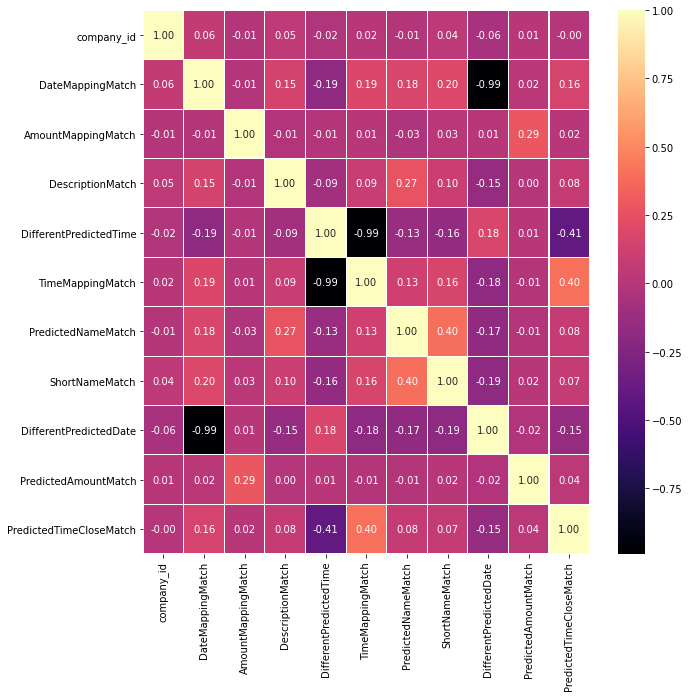

In [7]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

There Exists High Correlation between DateMappingMatch & DifferentPredicatedDate . We can drop one of them depending on how they contribute to the outcome

## Making A Labelled Set

Since we have exact matches for some of the Transactions , we'll be able to create a labelled set using them .

We can put exact matches from matched_transaction_id and feature_transaction_id as a Correct Catch and the rest of the transactions inside the same matched_transaction_id can be labelled as an Incorrect catch

In [43]:
df['CorrectMatch'] = np.where(df['matched_transaction_id']==df['feature_transaction_id'],1,0)
transaction_ids_with_exact_match = df[df['CorrectMatch']==1].matched_transaction_id.to_list()


m_df =  df[df['matched_transaction_id'].isin(transaction_ids_with_exact_match)]
nm_df = df[~(df['matched_transaction_id'].isin(transaction_ids_with_exact_match))]

In [22]:
feature_columns = ['DateMappingMatch', 'AmountMappingMatch','DescriptionMatch', 'DifferentPredictedTime', 'TimeMappingMatch',
                   'PredictedNameMatch', 'ShortNameMatch', 'DifferentPredictedDate','PredictedAmountMatch', 'PredictedTimeCloseMatch']

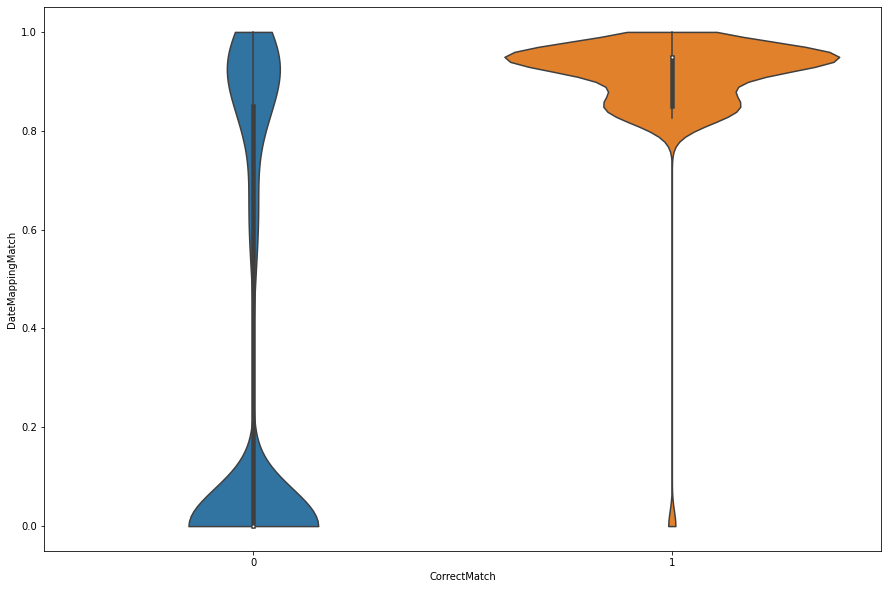

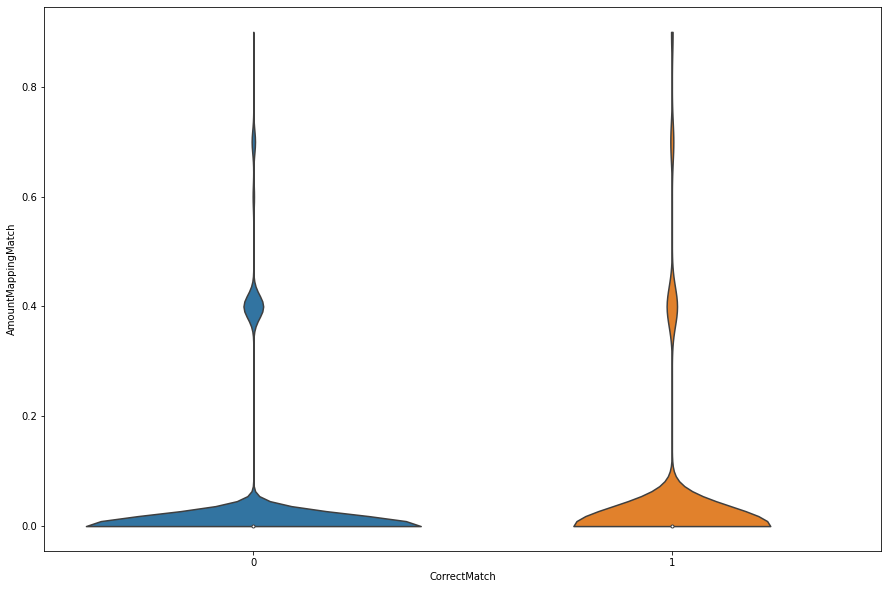

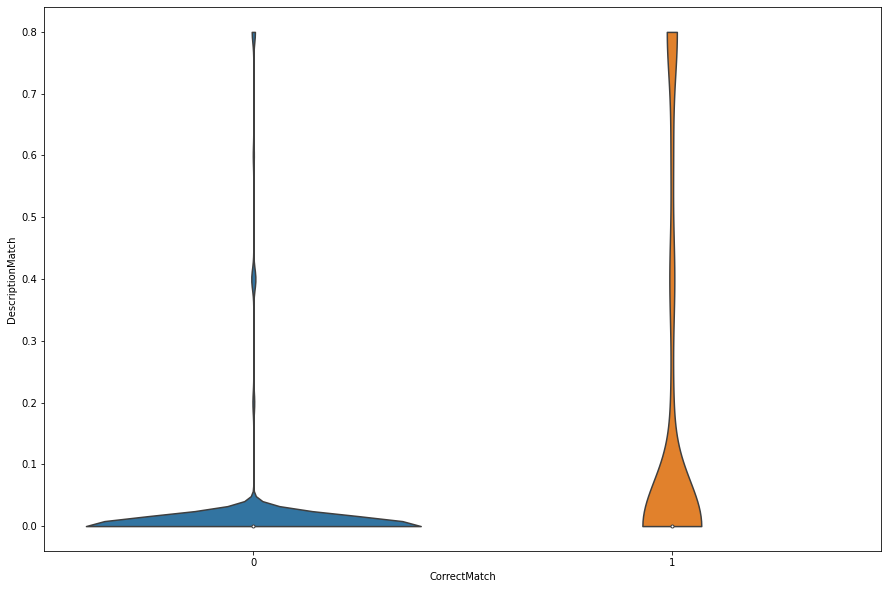

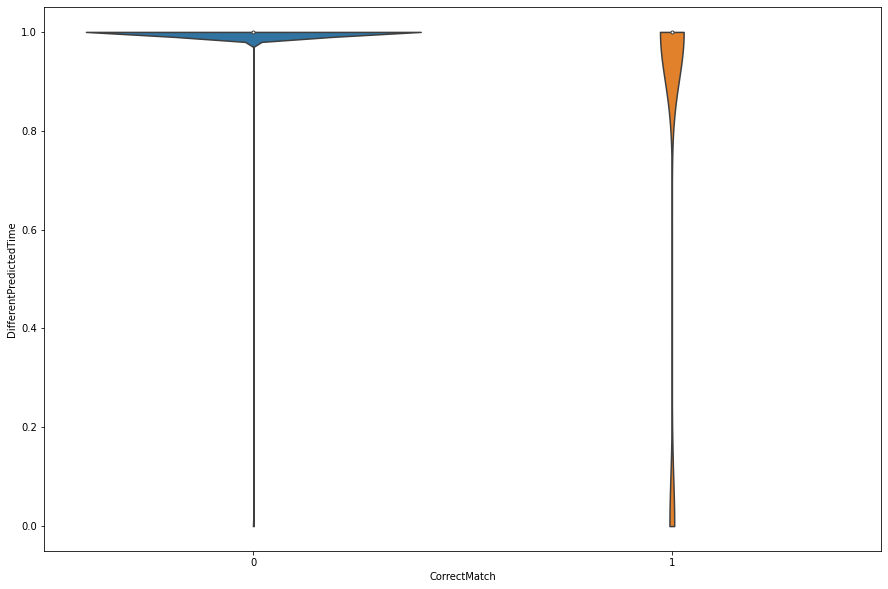

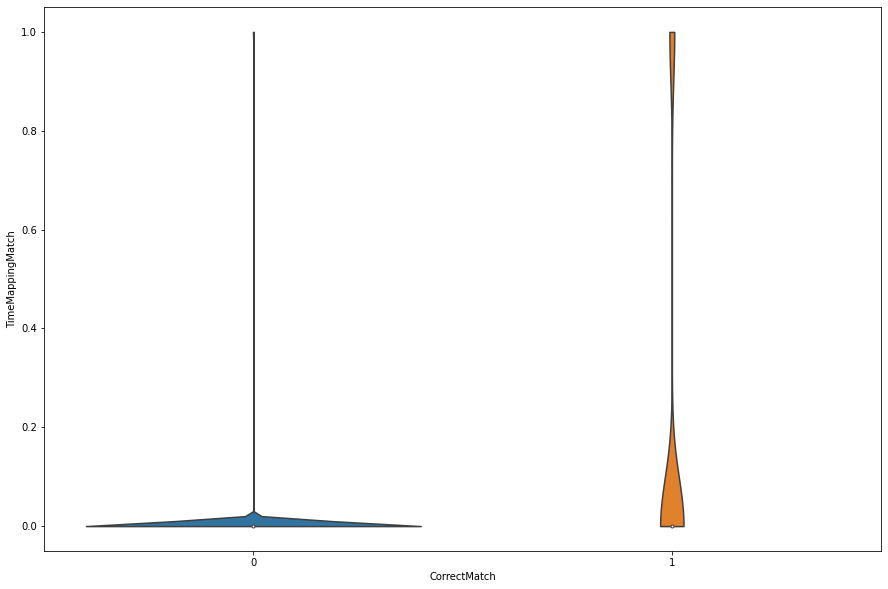

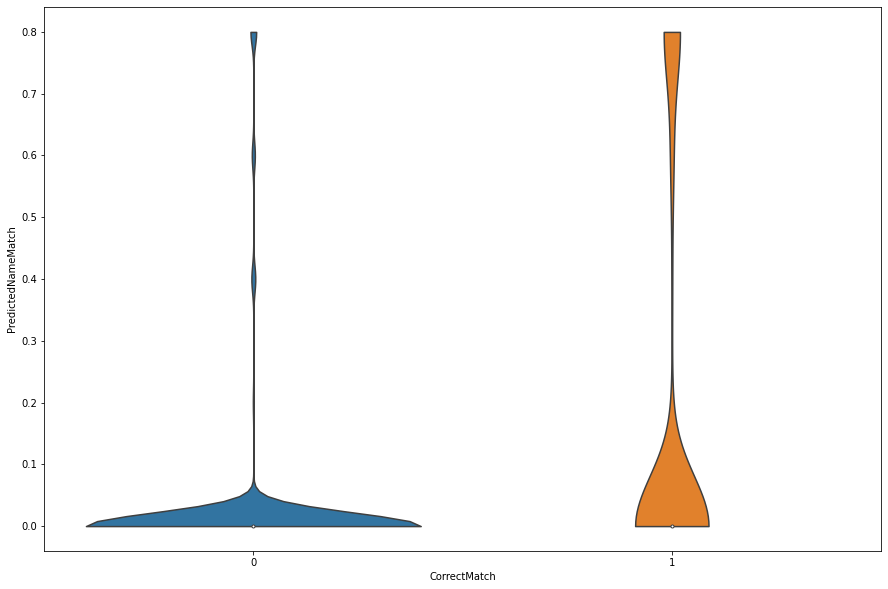

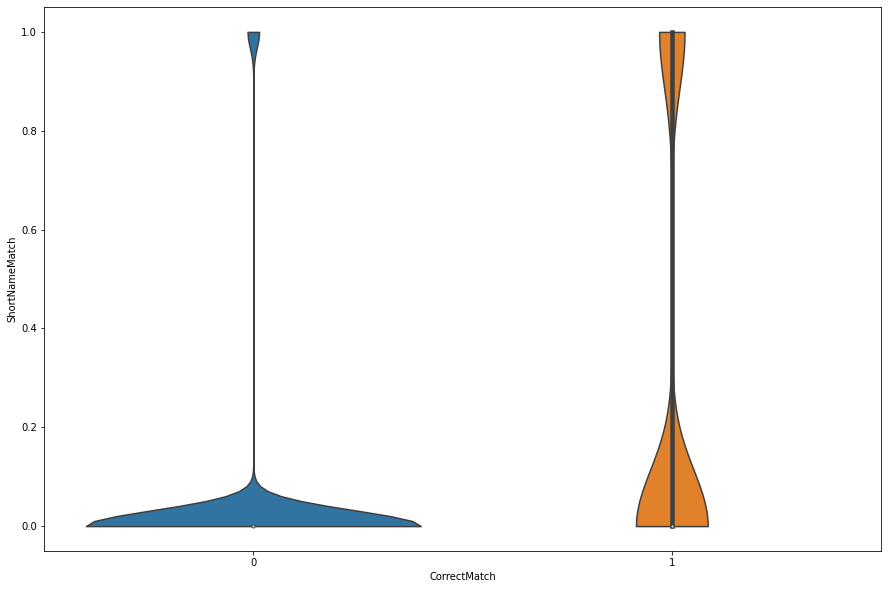

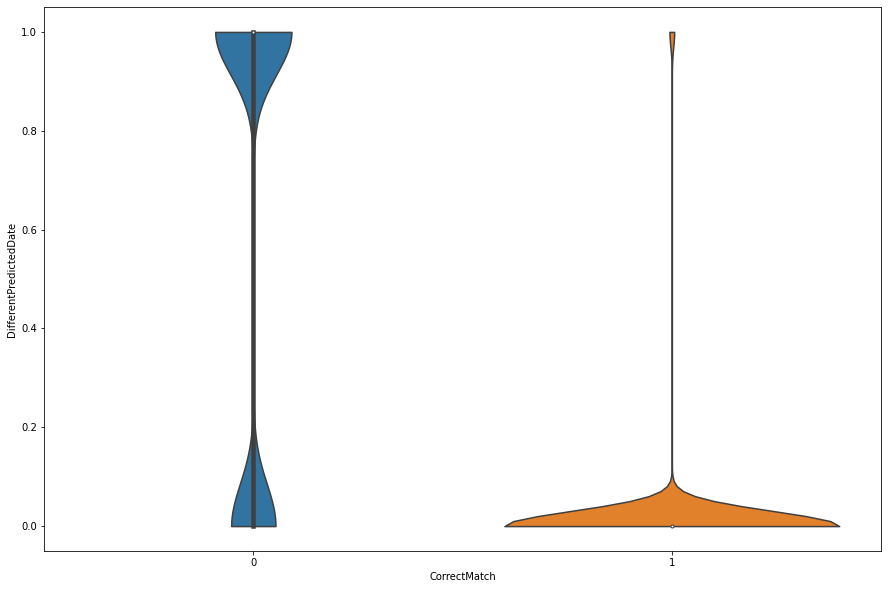

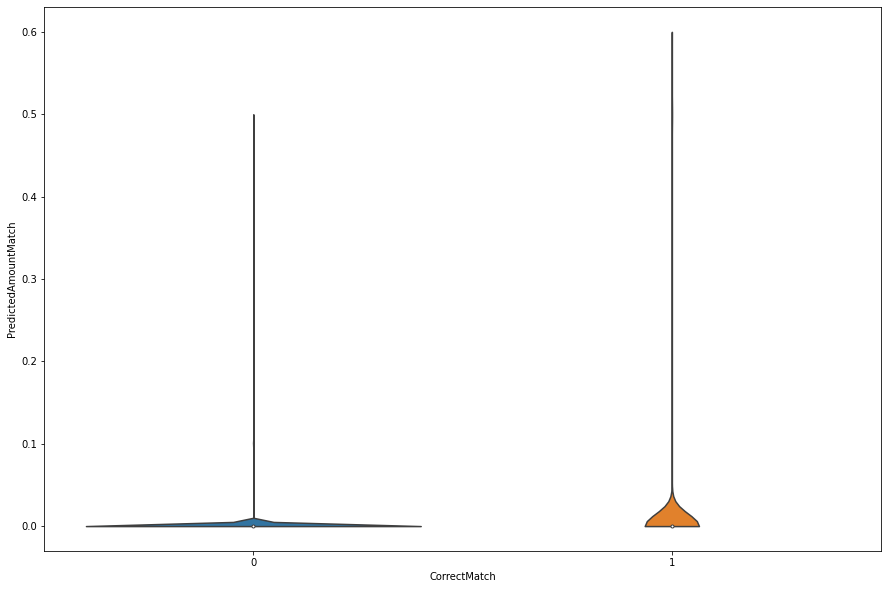

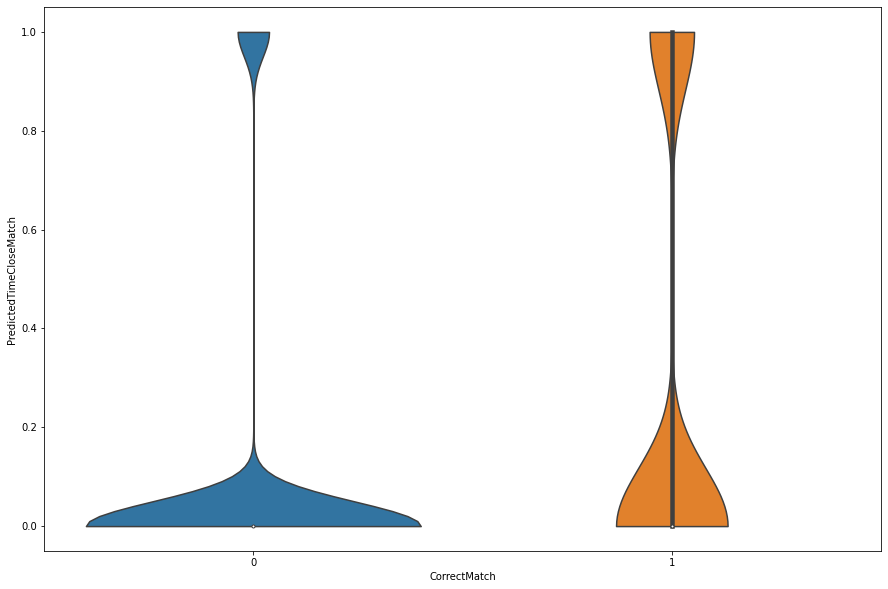

In [44]:
for column in feature_columns:
    sns.violinplot(x="CorrectMatch", y=column,  data=m_df, cut = 0)
    plt.show()

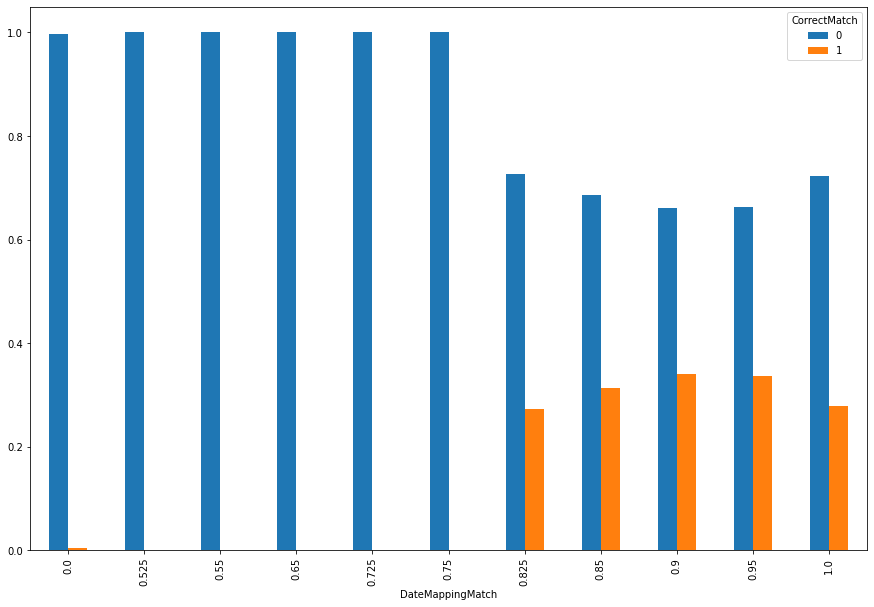

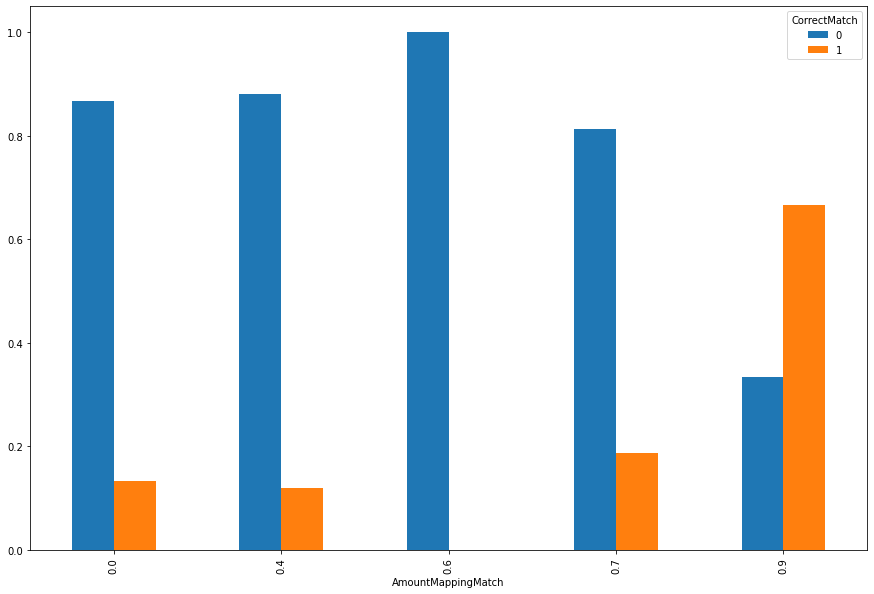

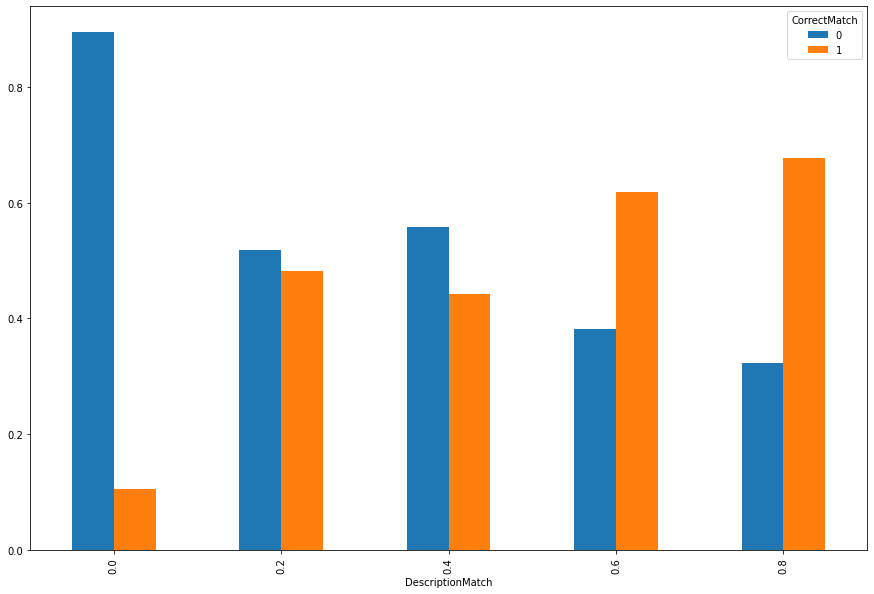

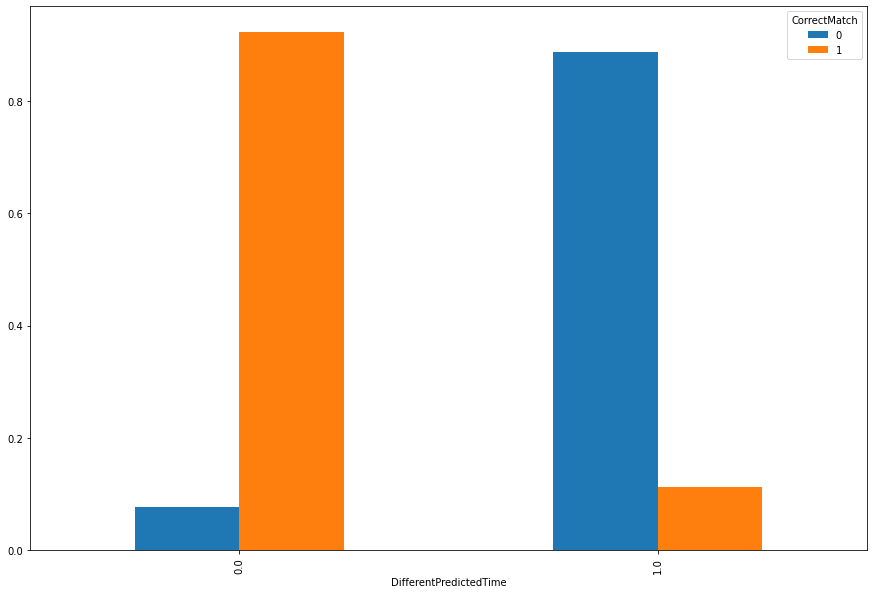

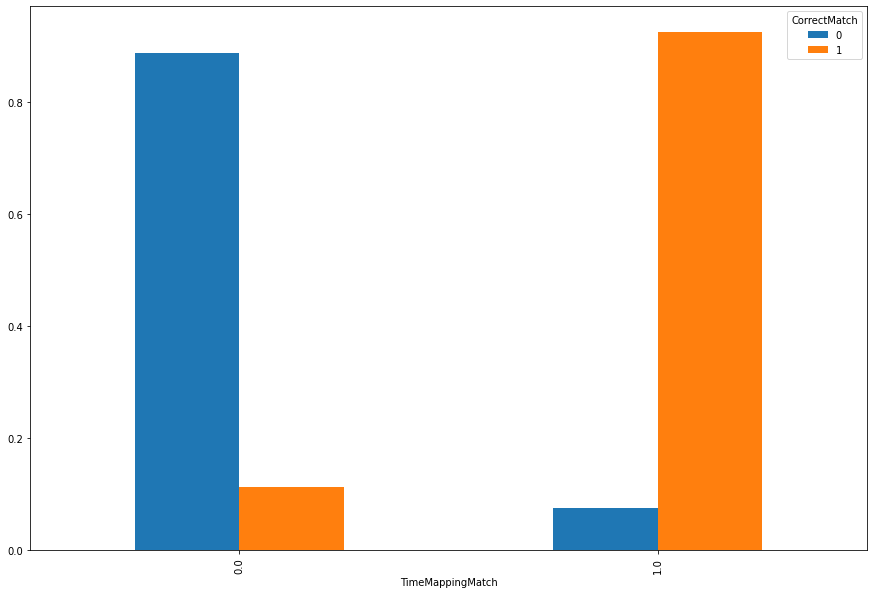

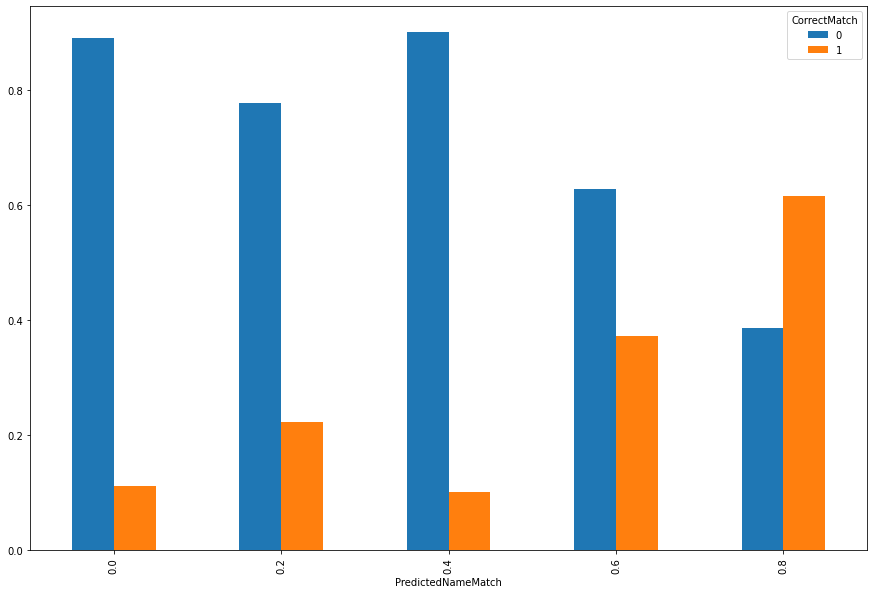

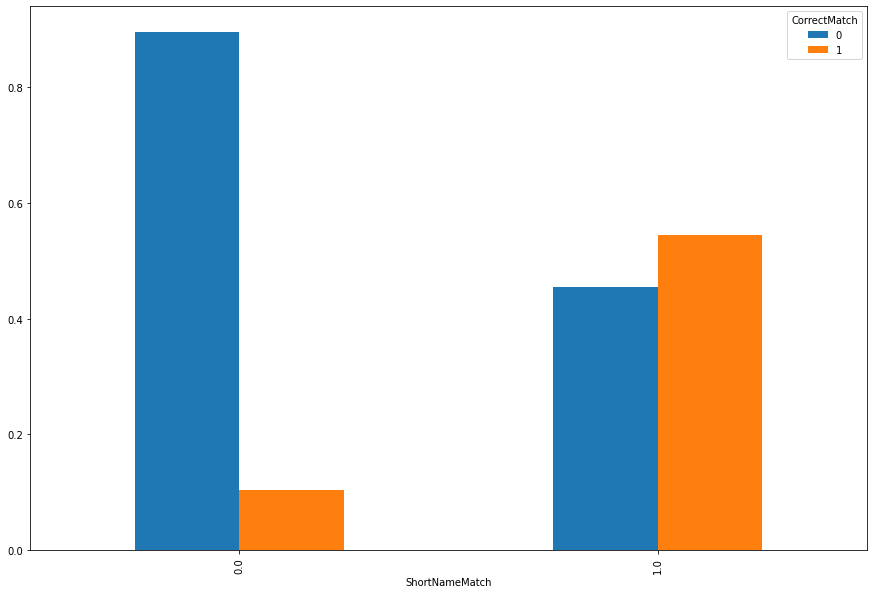

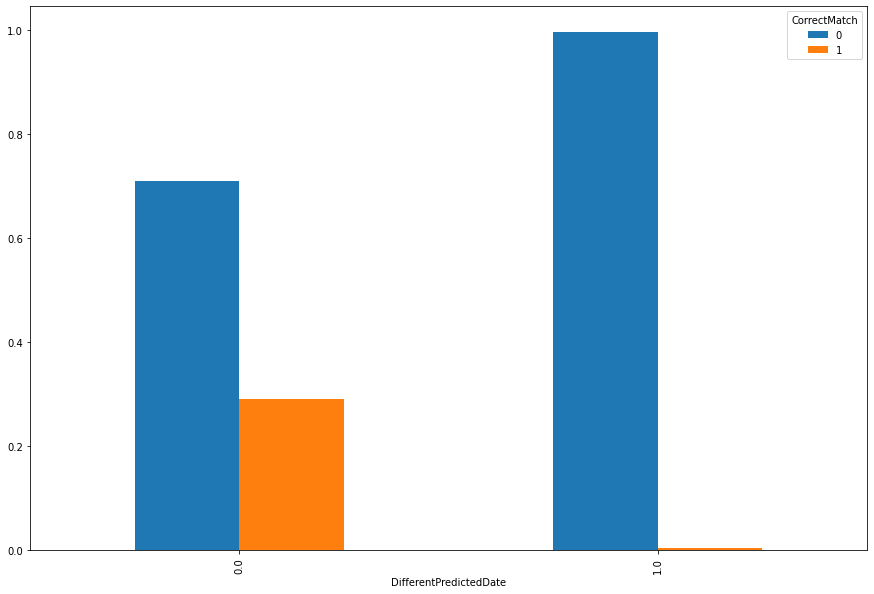

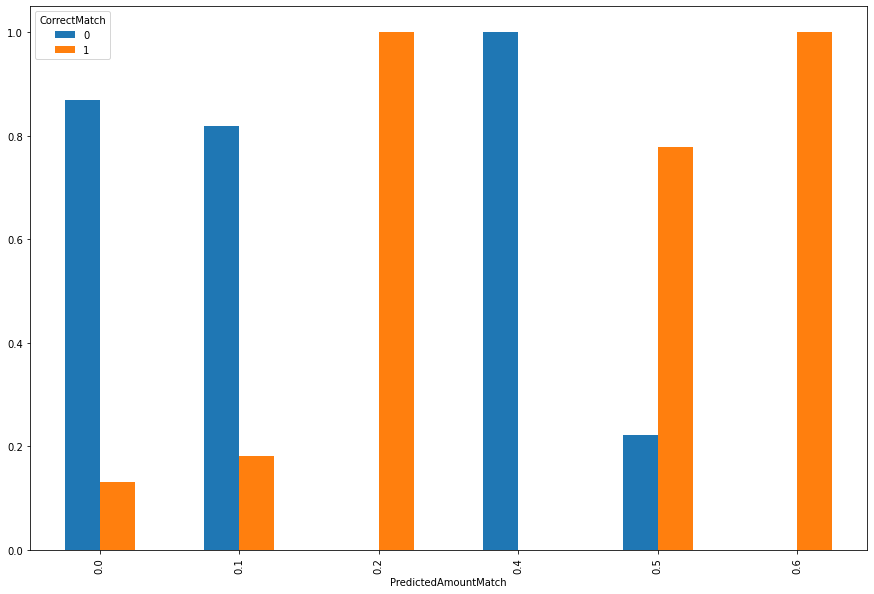

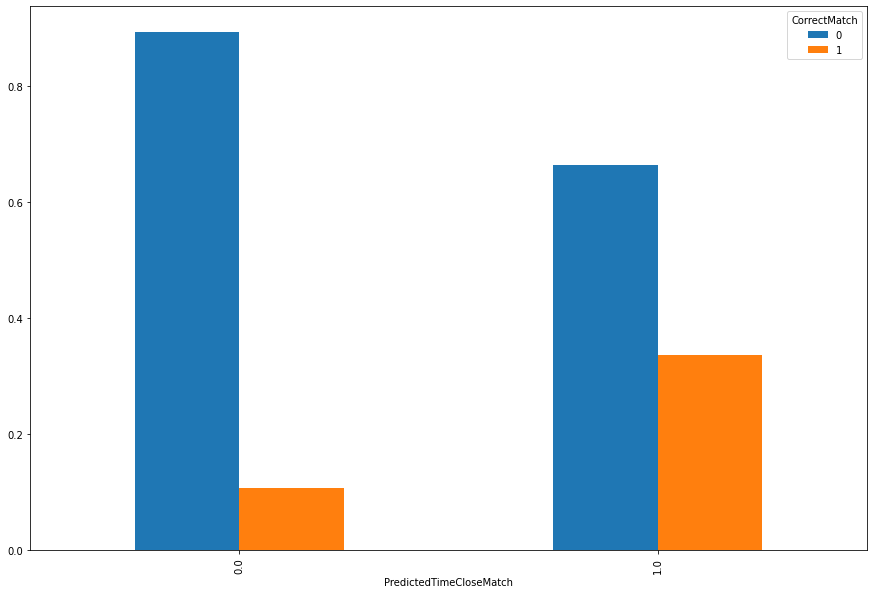

In [45]:
for column in feature_columns:
    pd.crosstab(m_df[column],m_df['CorrectMatch'], normalize='index').plot(kind='bar')
    plt.show()

From the crosstab results we can find the following insights

- Columns which strongly helps identifying both the classes separately
    - DateMappingMatch
    - AmountMappingMatch
    - DifferentPredictedTime
    - TimeMappingMatch
    - PredictedAmountMatch
- Columns which helps in identifying (Not so Strong)
    - PredictedNameMatch
    - DescriptionMatch
- Columns which weakly helps
    - ShortNameMatch
    - PredictedTimeCloseMatch

In [110]:
pca = pca()

In [112]:
out = pca.fit_transform(X)

[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Processing dataframe..
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [113]:
print(out['topfeat'])

     PC                  feature   loading  type
0   PC1   DifferentPredictedDate -0.739219  best
1   PC2  PredictedTimeCloseMatch  0.896660  best
2   PC3           ShortNameMatch  0.895214  best
3   PC4         TimeMappingMatch  0.644317  best
4   PC5       PredictedNameMatch  0.695707  best
5   PC6         DescriptionMatch  0.715181  best
6   PC7       AmountMappingMatch  0.876453  best
7   PC8         DateMappingMatch -0.746307  best
8   PC9     PredictedAmountMatch  0.997622  best
9  PC10   DifferentPredictedTime  0.711103  best


In [122]:
from sklearn.linear_model import LinearRegression,LogisticRegression

In [115]:
model = LinearRegression()
# fit the model
model.fit(X, y)

LinearRegression()

In [120]:
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

Feature: 0, Score: 0.69793
Feature: 1, Score: -0.04872
Feature: 2, Score: 0.52173
Feature: 3, Score: -0.08824
Feature: 4, Score: 0.43419
Feature: 5, Score: 0.14404
Feature: 6, Score: 0.23985
Feature: 7, Score: 0.40055
Feature: 8, Score: 1.10677
Feature: 9, Score: 0.03586


In [117]:
X.columns

Index(['DateMappingMatch', 'AmountMappingMatch', 'DescriptionMatch',
       'DifferentPredictedTime', 'TimeMappingMatch', 'PredictedNameMatch',
       'ShortNameMatch', 'DifferentPredictedDate', 'PredictedAmountMatch',
       'PredictedTimeCloseMatch'],
      dtype='object')

In [123]:
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 4.66821
Feature: 1, Score: 0.10303
Feature: 2, Score: 4.02210
Feature: 3, Score: -1.55849
Feature: 4, Score: 1.96335
Feature: 5, Score: 1.47926
Feature: 6, Score: 1.89083
Feature: 7, Score: -0.76919
Feature: 8, Score: 2.81753
Feature: 9, Score: 0.55068


Positive Coefficients - Predicts class 1
Negative Coefficient - Predicts class 0

In [126]:
from sklearn.tree import DecisionTreeClassifier

In [127]:
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.41057
Feature: 1, Score: 0.01537
Feature: 2, Score: 0.19079
Feature: 3, Score: 0.00124
Feature: 4, Score: 0.15549
Feature: 5, Score: 0.08498
Feature: 6, Score: 0.11021
Feature: 7, Score: 0.00003
Feature: 8, Score: 0.01592
Feature: 9, Score: 0.01542


In [129]:
X

,DateMappingMatch,AmountMappingMatch,DescriptionMatch,DifferentPredictedTime,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch
20,0.00,0.4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
21,0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
22,0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
23,0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
24,0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
12029,0.65,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12030,0.65,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12031,0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
12032,0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [128]:
df.columns

Index(['receipt_id', 'company_id', 'matched_transaction_id',
       'feature_transaction_id', 'DateMappingMatch', 'AmountMappingMatch',
       'DescriptionMatch', 'DifferentPredictedTime', 'TimeMappingMatch',
       'PredictedNameMatch', 'ShortNameMatch', 'DifferentPredictedDate',
       'PredictedAmountMatch', 'PredictedTimeCloseMatch', 'CorrectMatch'],
      dtype='object')

In [132]:
final_cols = ['DateMappingMatch','DescriptionMatch', 'DifferentPredictedTime','PredictedAmountMatch']

In [133]:
X,y = m_df[final_cols],m_df['CorrectMatch']

,DateMappingMatch,DescriptionMatch,DifferentPredictedTime,PredictedAmountMatch
20,0.00,0.0,1.0,0.0
21,0.00,0.0,1.0,0.0
22,0.00,0.0,1.0,0.0
23,0.00,0.0,1.0,0.0
24,0.00,0.0,1.0,0.0
...,...,...,...,...
12029,0.65,0.0,1.0,0.0
12030,0.65,0.0,1.0,0.0
12031,0.00,0.0,1.0,0.0
12032,0.00,0.0,1.0,0.0


In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13,stratify=y)

In [153]:
LG = LogisticRegression(class_weight={1:87,0:13},random_state=42)

In [154]:
LG.fit(X_train,y_train)

LogisticRegression(class_weight={0: 13, 1: 87}, random_state=42)

In [162]:
LG.coef_

array([[ 6.66202481,  5.11000788, -3.8405559 , 13.37733706]])

In [155]:
y_pred = LG.predict(X_test)

In [156]:
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'F1-Score: {f1_score(y_test,y_pred)}')

Accuracy Score: 0.7264296754250387
Confusion Matrix: 
[[773 350]
 [  4 167]]
Area Under Curve: 0.8324715022938766
Recall score: 0.9766081871345029
F1-Score: 0.48546511627906974


In [157]:
y_test.sum()

171

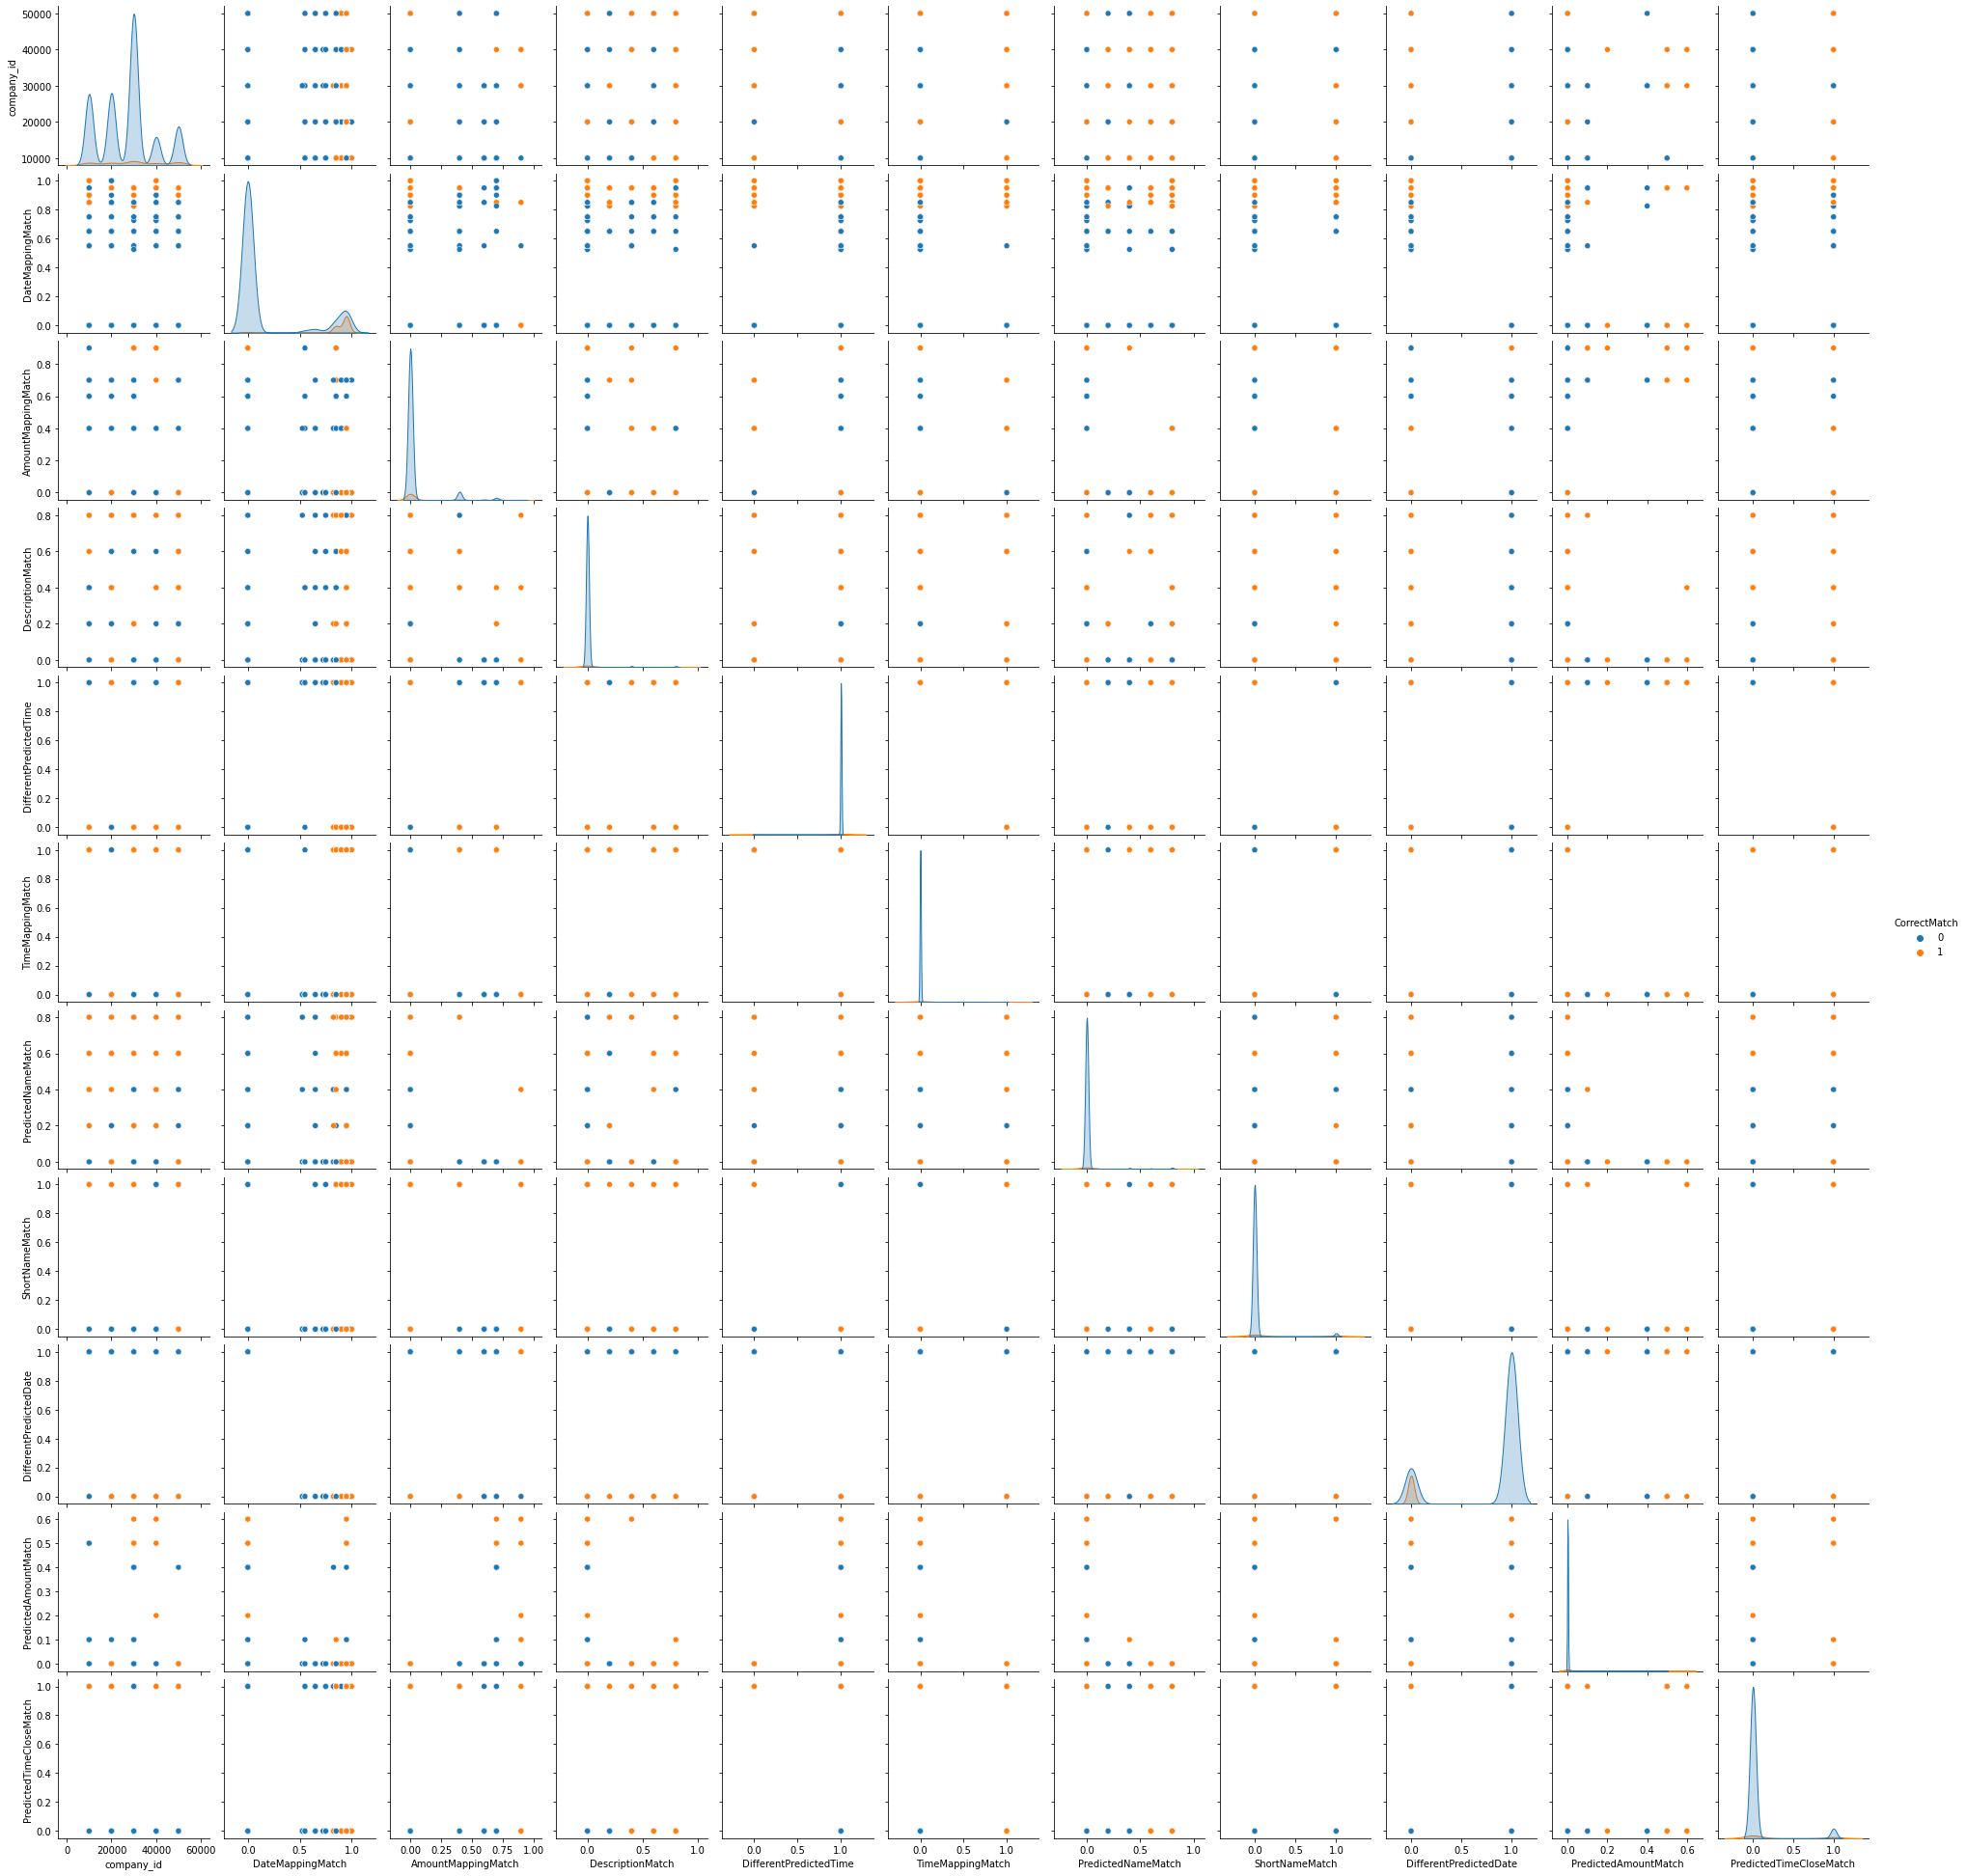

In [161]:
sns.pairplot(df, hue = 'CorrectMatch')

In [ ]:
DateMappingMatch is good 

In [173]:
feature,target = 'DifferentPredictedDate','CorrectMatch'
df_woe_iv = (pd.crosstab(df[feature],df[target],
                      normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

In [185]:
for i in df.columns:
    print(m_df[i].value_counts())

30,393    25
30,081    25
30,303    25
30,177    23
30,203    23
          ..
40,016     1
50,003     1
40,007     1
50,085     1
50,006     1
Name: receipt_id, Length: 857, dtype: int64
30000    2637
10000    1321
20000    1033
50000     885
40000     592
Name: company_id, dtype: int64
31,462    25
31,463    25
31,460    25
30,398    23
30,395    23
          ..
50,306     1
40,292     1
40,264     1
10,132     1
50,251     1
Name: matched_transaction_id, Length: 857, dtype: int64
30,990    10
30,563    10
30,562    10
30,988    10
30,564     9
          ..
10,692     1
20,326     1
40,476     1
31,066     1
10,305     1
Name: feature_transaction_id, Length: 2088, dtype: int64
0.000    3559
0.950    1606
0.850     562
0.900     212
0.650     193
0.825     172
0.550      94
1.000      36
0.750      20
0.525      11
0.725       3
Name: DateMappingMatch, dtype: int64
0.0    6025
0.4     350
0.7      64
0.6      20
0.9       9
Name: AmountMappingMatch, dtype: int64
0.0    6091
0.8     161

KeyError: 'DateMap'

In [177]:
continuous_cols = ['DateMappingMatch','AmountMappingMatch','DescriptionMatch','PredictedNameMatch','PredictedAmountMatch']

In [186]:
m_df['DateMap'] = np.where(m_df['DateMappingMatch']>=0.5,1,0)

/home/britto/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [187]:
m_df['AmountMap'] = np.where(m_df['AmountMappingMatch']>=0.1,1,0)
m_df['DesMatch'] = np.where(m_df['DescriptionMatch']>=0.1,1,0)
m_df['NameMatch'] = np.where(m_df['PredictedNameMatch']>=0.1,1,0)
m_df['PredAmt'] = np.where(m_df['PredictedAmountMatch']>=0.05,1,0)

/home/britto/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/britto/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/britto/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [197]:
feature,target = 'PredAmt','CorrectMatch'
df_woe_iv = (pd.crosstab(m_df[feature],m_df[target],
                      normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

In [198]:
df_woe_iv

CorrectMatch,0,1,woe,iv
PredAmt,,,,
0,0.997505,0.984831,-0.012787,0.023038
1,0.002495,0.015169,1.804938,0.023038
